In [218]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob


In [219]:

data_dir_train = pathlib.Path("/content/drive/MyDrive/Major Project - Melanoma Detection (4th Year ECE IIIT BHOPAL)/Melanoma Detection Dataset/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Major Project - Melanoma Detection (4th Year ECE IIIT BHOPAL)/Melanoma Detection Dataset/Test")


In [220]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


395
63


In [221]:
batch_size = 32
img_height = 180
img_width = 180


In [222]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 395 files belonging to 9 classes.
Using 316 files for training.


# New Section

In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)


Found 395 files belonging to 9 classes.
Using 79 files for validation.


In [225]:
class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


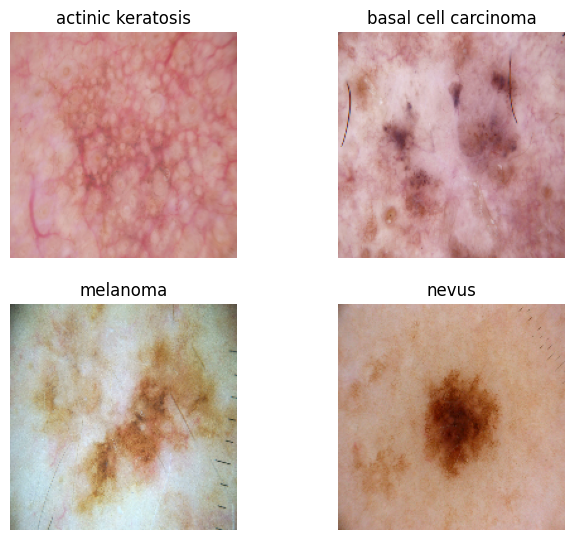

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
for i in range(len(class_names)):
  filtered_ds = train_ds.filter(lambda x,l:tf.math.equal(l[0], i))
  for image, label in filtered_ds.take(1):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')


In [227]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



In [228]:
num_classes = len(class_names)

In [229]:

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [230]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [231]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
10/10 [==============================] - 55s 5s/step - loss: 1.3941 - accuracy: 0.5316 - val_loss: 1.1528 - val_accuracy: 0.5570
Epoch 2/20
10/10 [==============================] - 9s 936ms/step - loss: 0.9349 - accuracy: 0.6487 - val_loss: 1.1191 - val_accuracy: 0.5570
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 0.8935 - accuracy: 0.6361 - val_loss: 0.8910 - val_accuracy: 0.5570
Epoch 4/20
10/10 [==============================] - 12s 1s/step - loss: 0.8091 - accuracy: 0.6234 - val_loss: 0.8026 - val_accuracy: 0.5696
Epoch 5/20
10/10 [==============================] - 9s 951ms/step - loss: 0.7544 - accuracy: 0.6519 - val_loss: 0.8104 - val_accuracy: 0.5696
Epoch 6/20
10/10 [==============================] - 12s 1s/step - loss: 0.7507 - accuracy: 0.6804 - val_loss: 0.9007 - val_accuracy: 0.5949
Epoch 7/20
10/10 [==============================] - 12s 1s/step - loss: 0.7112 - accuracy: 0.7152 - val_loss: 0.8430 - val_accuracy: 0.6076
Epoch 8/20
10/10

In [232]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



In [233]:
loss = history.history['loss']
val_loss = history.history['val_loss']


In [234]:
epochs_range = range(epochs)



Text(0.5, 1.0, 'Training and Validation Accuracy')

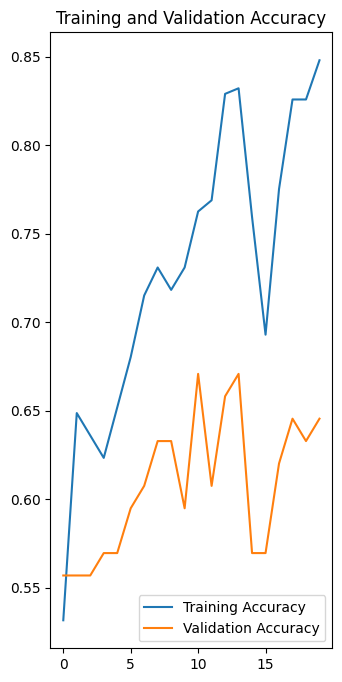

In [235]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



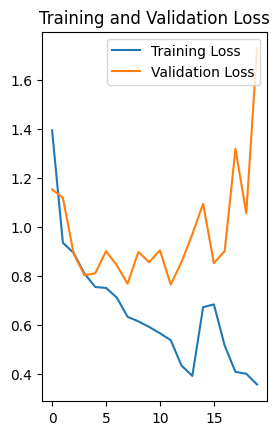

In [236]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [237]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)



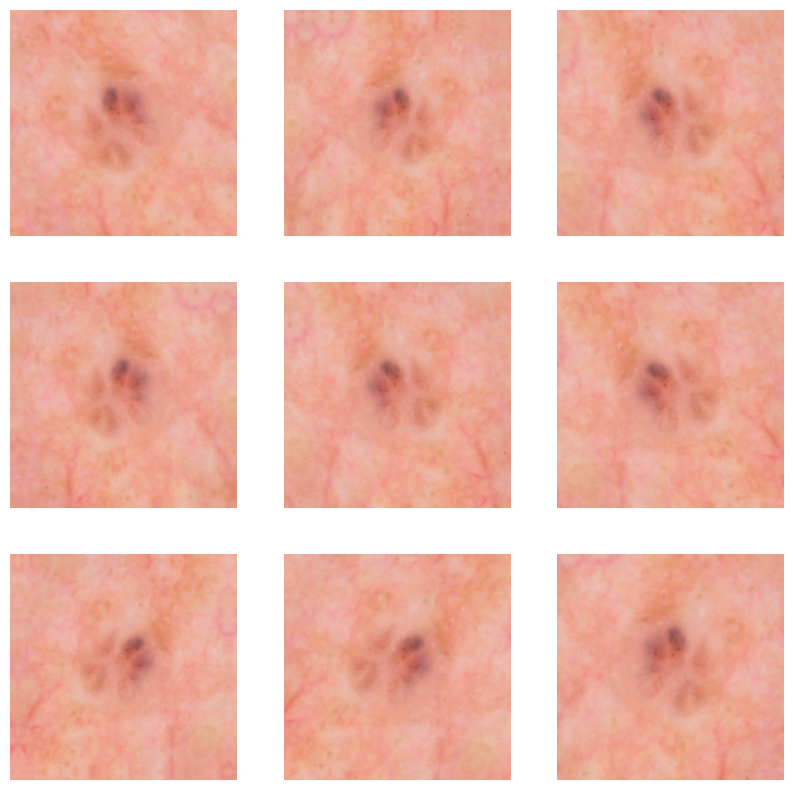

In [238]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")



In [239]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [240]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [241]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/20
10/10 [==============================] - 15s 1s/step - loss: 1.4556 - accuracy: 0.4684 - val_loss: 1.2319 - val_accuracy: 0.3291
Epoch 2/20
10/10 [==============================] - 13s 1s/step - loss: 0.9852 - accuracy: 0.5886 - val_loss: 1.0179 - val_accuracy: 0.5570
Epoch 3/20
10/10 [==============================] - 12s 1s/step - loss: 0.8886 - accuracy: 0.6392 - val_loss: 0.9924 - val_accuracy: 0.5570
Epoch 4/20
10/10 [==============================] - 14s 1s/step - loss: 0.8879 - accuracy: 0.6487 - val_loss: 0.9719 - val_accuracy: 0.5570
Epoch 5/20
10/10 [==============================] - 12s 1s/step - loss: 0.8901 - accuracy: 0.5823 - val_loss: 0.9020 - val_accuracy: 0.5443
Epoch 6/20
10/10 [==============================] - 13s 1s/step - loss: 0.8361 - accuracy: 0.6392 - val_loss: 0.8849 - val_accuracy: 0.5570
Epoch 7/20
10/10 [==============================] - 14s 1s/step - loss: 0.7695 - accuracy: 0.6709 - val_loss: 0.9749 - val_accuracy: 0.5063
Epoch 8/20
10/10 [==

In [242]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



In [243]:
loss = history.history['loss']
val_loss = history.history['val_loss']



In [244]:
epochs_range = range(epochs)



Text(0.5, 1.0, 'Training and Validation Accuracy')

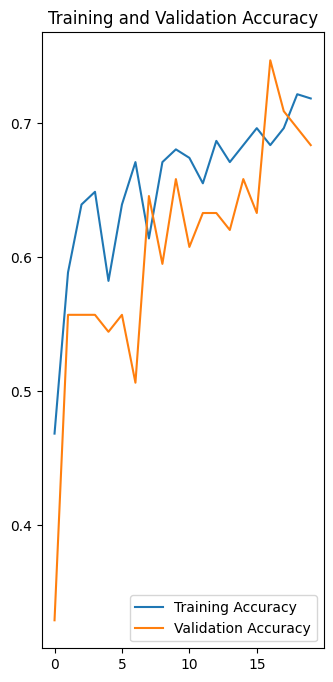

In [245]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



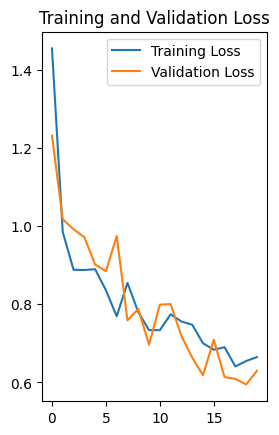

In [246]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [247]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df



,Path,Label
0,/content/drive/MyDrive/Major Project - Melanom...,nevus
1,/content/drive/MyDrive/Major Project - Melanom...,nevus
2,/content/drive/MyDrive/Major Project - Melanom...,nevus
3,/content/drive/MyDrive/Major Project - Melanom...,nevus
4,/content/drive/MyDrive/Major Project - Melanom...,nevus
...,...,...
1356,/content/drive/MyDrive/Major Project - Melanom...,actinic keratosis
1357,/content/drive/MyDrive/Major Project - Melanom...,actinic keratosis
1358,/content/drive/MyDrive/Major Project - Melanom...,actinic keratosis
1359,/content/drive/MyDrive/Major Project - Melanom...,actinic keratosis


In [248]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter



In [249]:
X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))



Class=4, n=338 (24.835%)
Class=3, n=438 (32.182%)
Class=2, n=95 (6.980%)
Class=1, n=376 (27.627%)
Class=0, n=114 (8.376%)


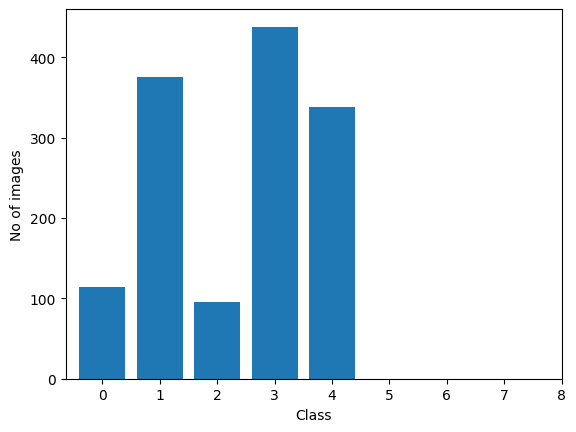

In [250]:
plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel("Class")
plt.ylabel("No of images")
plt.show()



In [251]:
!pip install Augmentor



In [252]:
path_to_training_dataset = '/content/drive/MyDrive/Major Project - Melanoma Detection (4th Year ECE IIIT BHOPAL)/Melanoma Detection Dataset/Train'
import Augmentor
for i in class_names:
#     print(str(path_to_training_dataset) + "/" + i)
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i, output_directory = '/kaggle/working/' + i +'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EC71DDA93C0>: 100%|██████████| 50/50 [00:02<00:00, 17.04 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EC72762AE60>: 100%|██████████| 50/50 [00:02<00:00, 23.68 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/dermatofibroma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EC713C4A170>: 100%|██████████| 50/50 [00:02<00:00, 24.82 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EC72762B610>: 100%|██████████| 50/50 [00:08<00:00,  5.84 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7EC713C485E0>: 100%|██████████| 50/50 [00:08<00:00,  6.02 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EC72762BD60>: 100%|██████████| 50/50 [00:01<00:00, 27.89 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EC713C9DED0>: 100%|██████████| 50/50 [00:03<00:00, 13.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EC72762B610>: 100%|██████████| 50/50 [00:01<00:00, 29.13 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/vascular lesion/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EC713D9EAD0>: 100%|██████████| 50/50 [00:03<00:00, 15.28 Samples/s]


In [253]:
output_dir = pathlib.Path('/kaggle/working/')



In [254]:
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)



7996


In [255]:
path_list = [x for x in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
path_list[:5]



['/kaggle/working/melanoma/output/melanoma_original_ISIC_0000035.jpg_b9bf3375-60e7-41f9-82cf-46e3e4d1adb5.jpg',
 '/kaggle/working/melanoma/output/melanoma_original_ISIC_0000013.jpg_26ddcfbe-a689-43c5-b584-3c9b02ee1972.jpg',
 '/kaggle/working/melanoma/output/melanoma_original_ISIC_0000004.jpg_e5c5ba73-e372-4eca-b573-6fc6db8178f3.jpg',
 '/kaggle/working/melanoma/output/melanoma_original_ISIC_0000040.jpg_c78c811d-df73-4214-8b04-5fcb1f30e719.jpg',
 '/kaggle/working/melanoma/output/melanoma_original_ISIC_0010476.jpg_9456d4c2-be1a-4c13-80d5-4817aa4d3c63.jpg']

In [256]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(output_dir, '*','output', '*.jpg'))]
lesion_list_new[:5]



['melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma']

In [257]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))



In [258]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df._append(df2)



In [259]:
new_df['Label'].value_counts()



basal cell carcinoma          1826
actinic keratosis             1564
dermatofibroma                1478
melanoma                      1401
nevus                         1138
dermatofibroma (1)             550
actinic keratosis (1)          550
basal cell carcinoma (1)       550
nevus (1)                       50
melanoma (1)                    50
vascular lesion                 50
pigmented benign keratosis      50
seborrheic keratosis            50
squamous cell carcinoma         50
Name: Label, dtype: int64

In [260]:
batch_size = 32
img_height = 180
img_width = 180



In [261]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [262]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [263]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [264]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [266]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/5
56/56 [==============================] - 91s 2s/step - loss: 1.2251 - accuracy: 0.5525 - val_loss: 1.2621 - val_accuracy: 0.5526
Epoch 2/5
56/56 [==============================] - 92s 2s/step - loss: 1.2062 - accuracy: 0.5642 - val_loss: 1.3613 - val_accuracy: 0.4989
Epoch 3/5
56/56 [==============================] - 90s 2s/step - loss: 1.2051 - accuracy: 0.5603 - val_loss: 1.2867 - val_accuracy: 0.5593
Epoch 4/5
56/56 [==============================] - 94s 2s/step - loss: 1.1888 - accuracy: 0.5731 - val_loss: 1.2992 - val_accuracy: 0.5235
Epoch 5/5
56/56 [==============================] - 94s 2s/step - loss: 1.1547 - accuracy: 0.5815 - val_loss: 1.3005 - val_accuracy: 0.5593


In [267]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



In [268]:
loss = history.history['loss']
val_loss = history.history['val_loss']


In [269]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

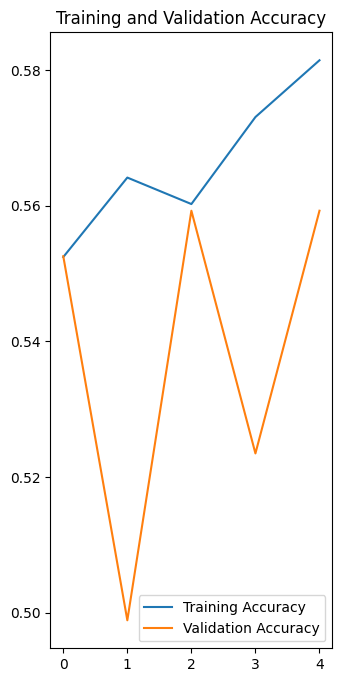

In [270]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



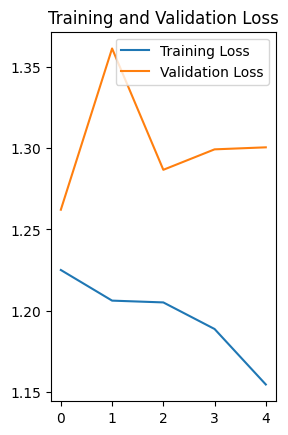

In [271]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()